### **Correlation between Categorical columns and Target column(Numerical)**

* In the following file we will learn about Chi Square test which is used to know the relation between categorical columns and Target column.
* The Chi-Square test in machine learning is a statistical method used to determine if there is a significant association between two categorical variables. It compares the observed frequency of events in a contingency table with the expected frequency under the assumption of independence. 
* This test is commonly used in feature selection to assess the relationship between input features and the target variable, helping to identify the most relevant features for classification models.

**1. Import Essential Libraries**

In [50]:
import pandas as pd 
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

**2. Basic Analysis on Data**

In [3]:
df = pd.read_csv("E:\\Machine Learning\\heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**3. Classification of data columns**

In [10]:
df_num = df.select_dtypes(include = [np.number])
df_cat = df.select_dtypes(include = ['object'])

In [12]:
print(df_num.columns)
print("-----------------------------")
print(df_cat.columns)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')
-----------------------------
Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [14]:
df_cat['HeartDisease'] = df_num['HeartDisease']

In [15]:
df_cat.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

**4. Correlation between categorical columns and target columns**

* The code performs a Chi-Square test of independence between several categorical features (e.g., 'Sex', 'ChestPainType', etc.) and the target variable 'HeartDisease'. For each feature, it creates a contingency table and calculates the Chi-Square statistic and p-value. The p-values for each feature are stored in the `chi2_results` dictionary.

In [20]:
chi2_results = {}
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',]:
    contingency_table = pd.crosstab(df_cat[col], df_cat['HeartDisease'])
    chi2, p , dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = p

* The code converts the chi2_results dictionary, which contains p-values for each feature, into a DataFrame called chi2_df. It then adds a new column, 'Significant', which marks whether the p-value for each feature is less than 0.05 (indicating statistical significance). Finally, it prints the DataFrame to display the features, their p-values, and significance status.

In [21]:
chi2_df = pd.DataFrame(list(chi2_results.items()), columns = ['Feature','P-Value'])
chi2_df['Significant'] = chi2_df['P-Value'] < 0.05
print(chi2_df)

          Feature       P-Value  Significant
0             Sex  4.597617e-20         True
1   ChestPainType  8.083728e-58         True
2      RestingECG  4.229233e-03         True
3  ExerciseAngina  2.907808e-50         True
4        ST_Slope  5.167638e-78         True


**5. Visualization between Columns and Target columns**

* The provided code generates bar plots to visualize the correlation between different categorical features and the target variable 'HeartDisease'.
* For each relevant feature (e.g., 'Sex', 'ChestPainType', 'ExerciseAngina', etc.), a bar chart will appear, showing the count of 'HeartDisease' categories (0 and 1) across the different categories of the feature.

<Figure size 800x500 with 0 Axes>

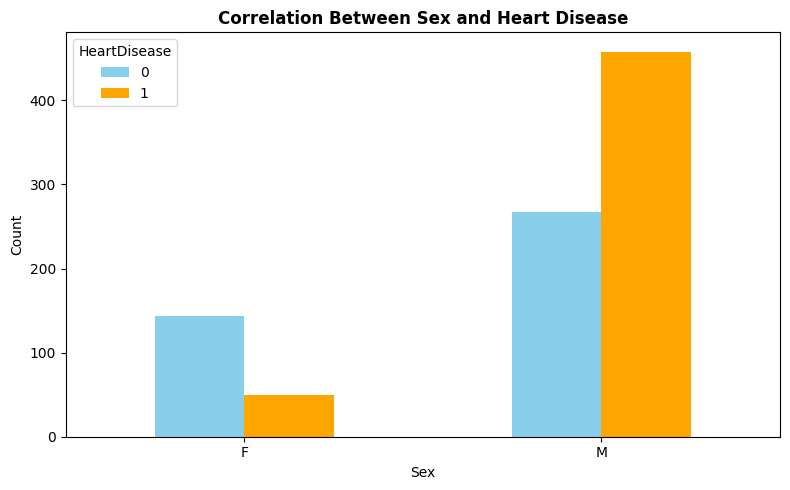

<Figure size 800x500 with 0 Axes>

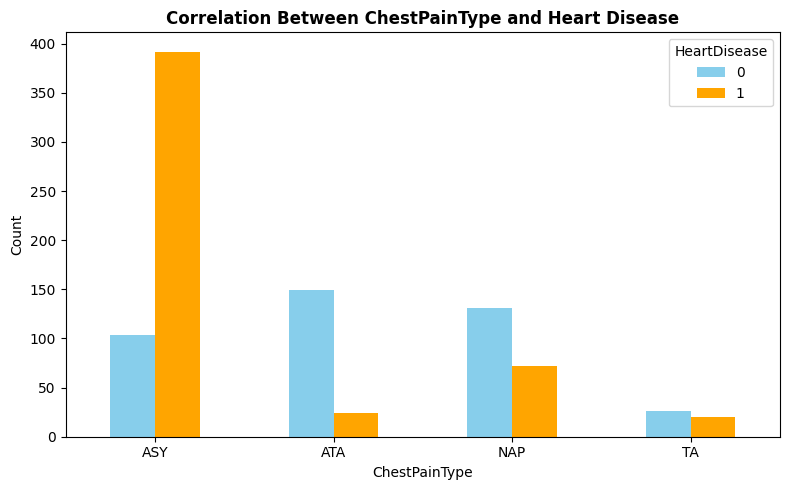

<Figure size 800x500 with 0 Axes>

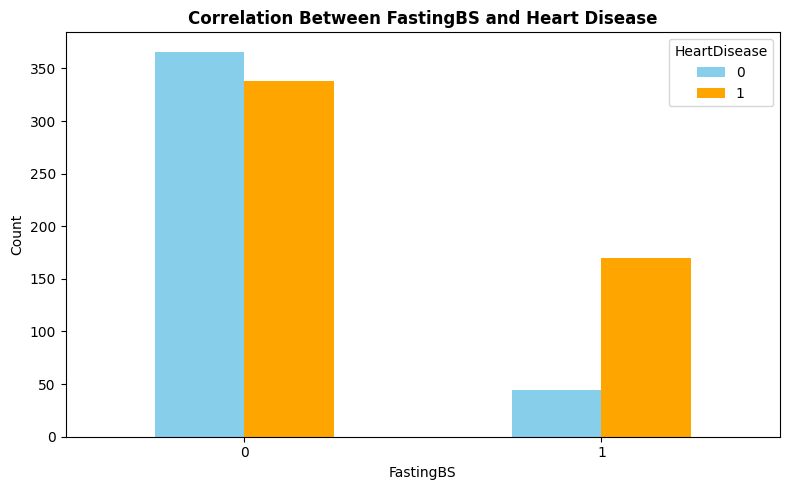

<Figure size 800x500 with 0 Axes>

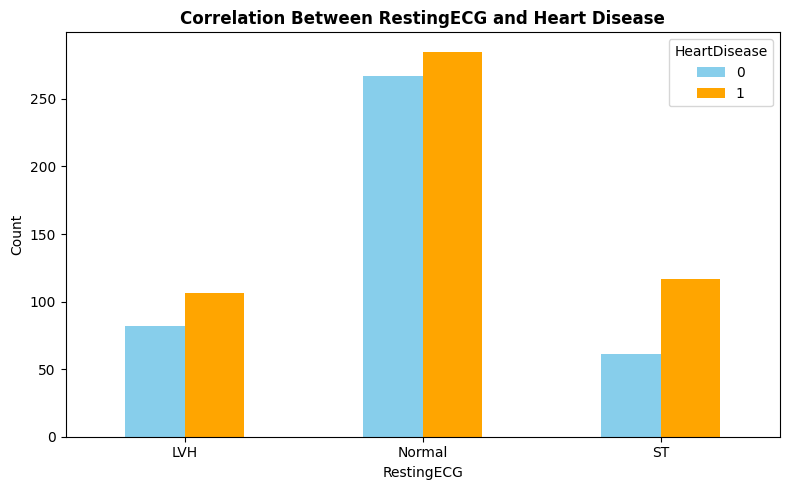

<Figure size 800x500 with 0 Axes>

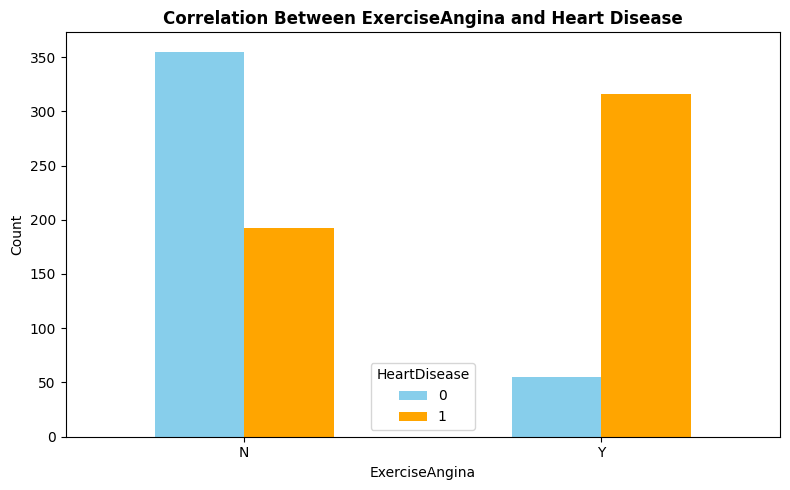

<Figure size 800x500 with 0 Axes>

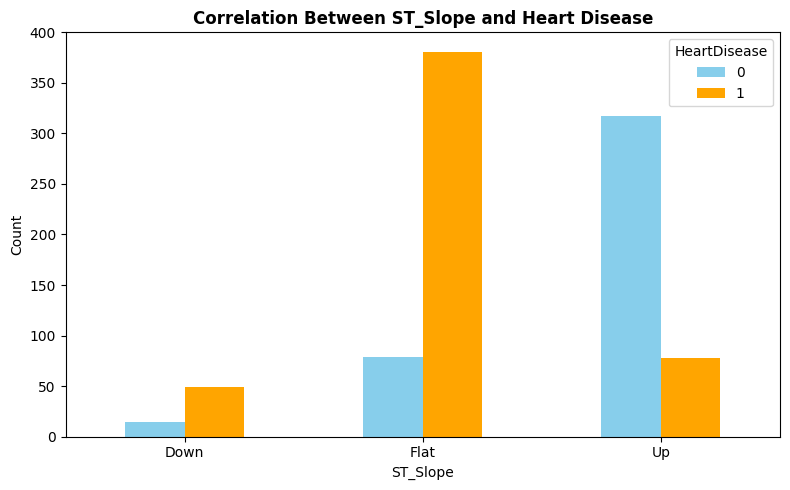

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Define columns to consider (excluding numerical columns)
heart_relevant_columns = [col for col in df.columns if col not in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

# Iterate over each relevant column
for column in heart_relevant_columns:
    if column != 'HeartDisease':  # Skip the 'HeartDisease' column itself
        plt.figure(figsize=(8, 5))
        
        # Create a cross-tabulation between the current column and 'HeartDisease'
        cross_tab = pd.crosstab(df[column], df['HeartDisease'])
        
        # Plot the bar chart
        cross_tab.plot(kind='bar', stacked=False, color=['skyblue', 'orange'], figsize=(8, 5)) 
        
        # Set the title and labels
        plt.title(f"Correlation Between {column} and Heart Disease", fontweight='bold')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=0)
        
        # Show the plot
        plt.tight_layout()
        plt.show()


* The provided code creates histograms with Kernel Density Estimation (KDE) plots to compare the distribution of numerical features ('Age', 'RestingBP', 'MaxHR', 'Oldpeak') for individuals with and without heart disease.
* For each of the four columns, two overlapping histograms will be plotted (one for individuals with heart disease and one for those without), allowing you to visually compare the distributions of these numerical features between the two groups.

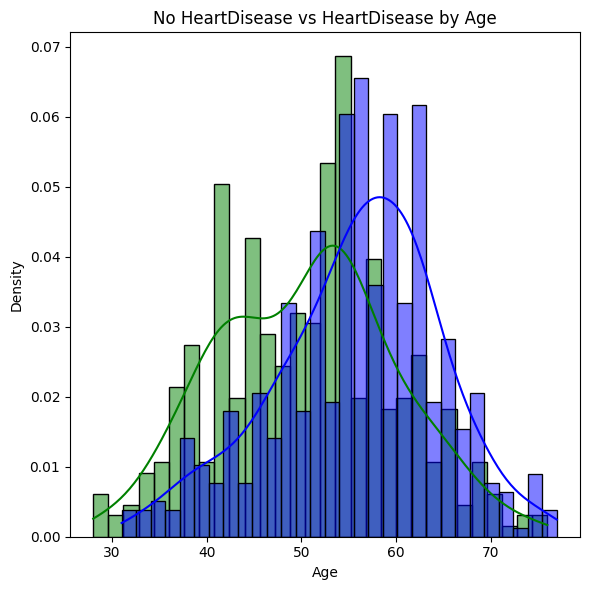

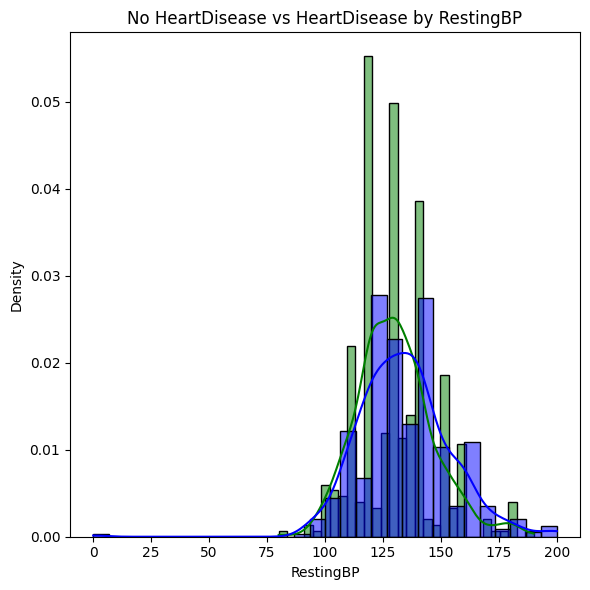

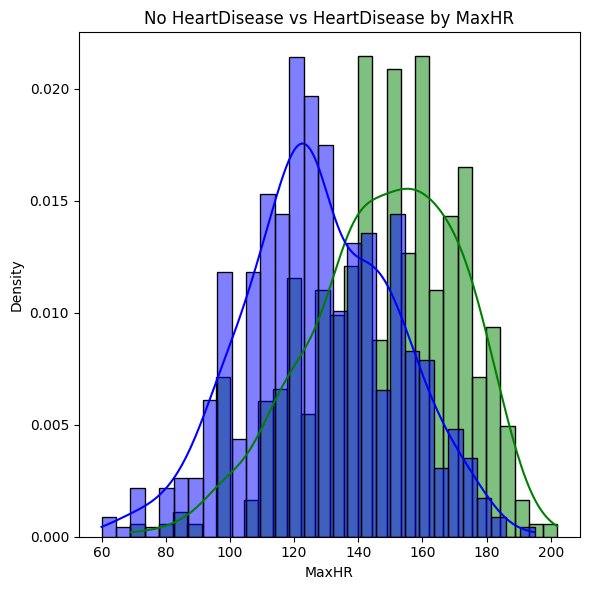

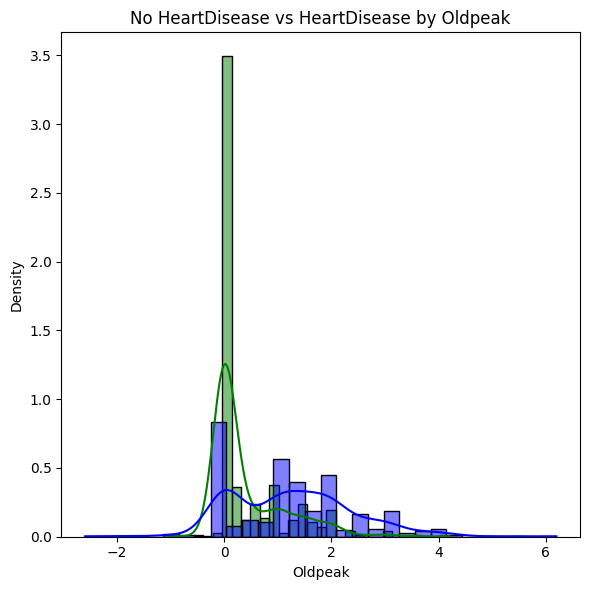

In [40]:
columns_to_plot = ['Age','RestingBP','MaxHR','Oldpeak']
for col in columns_to_plot:
    plt.figure (figsize = (6,6))

    sns.histplot(df[df['HeartDisease'] == 0][col], color = 'green', kde = True, label = 'No HeartDisease', bins = 30, stat = 'density')
    sns.histplot(df[df['HeartDisease'] == 1][col], color = 'blue', kde = True, label = 'HeartDisease', bins = 30, stat = 'density')

    plt.title(f"No HeartDisease vs HeartDisease by {col}")
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

* The provided code generates Kernel Density Estimation (KDE) plots for each categorical column (excluding numerical ones like 'Age', 'RestingBP', 'MaxHR', and 'Oldpeak') to compare the distribution of that feature between individuals with and without heart disease.

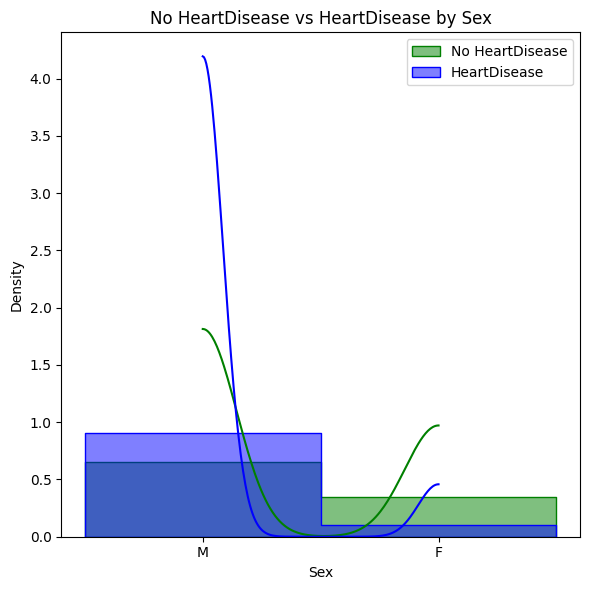

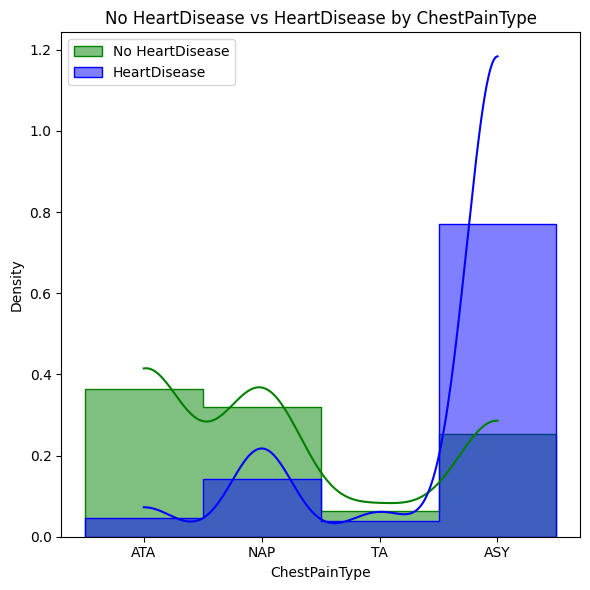

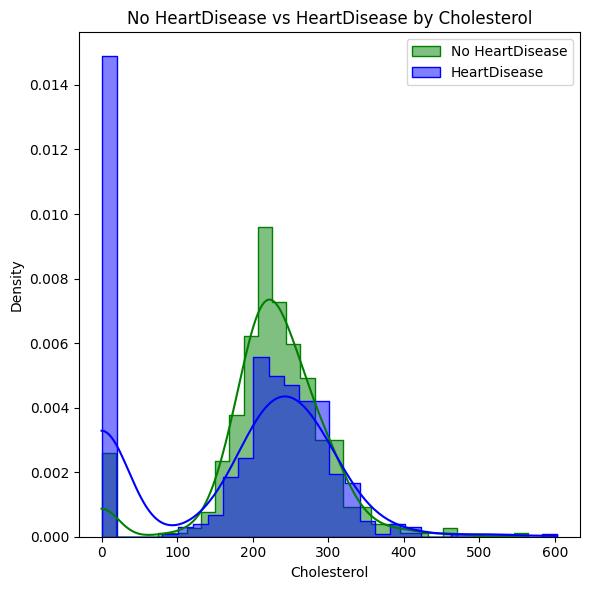

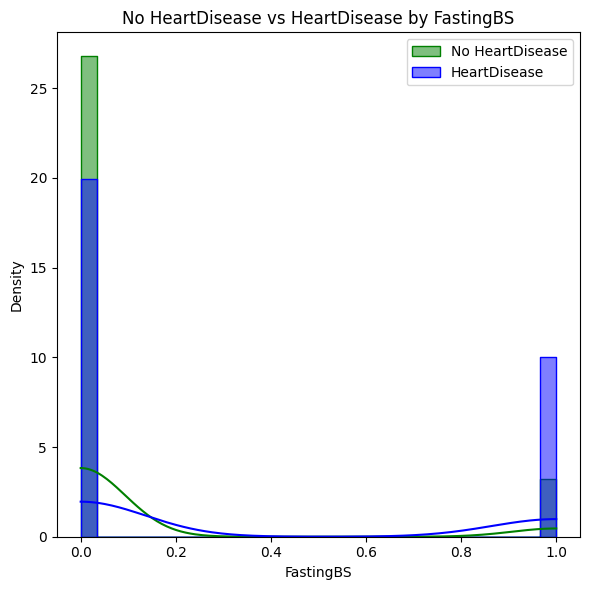

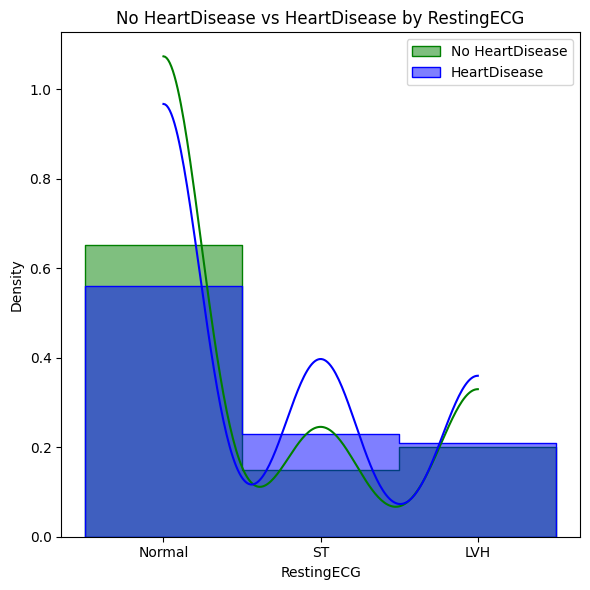

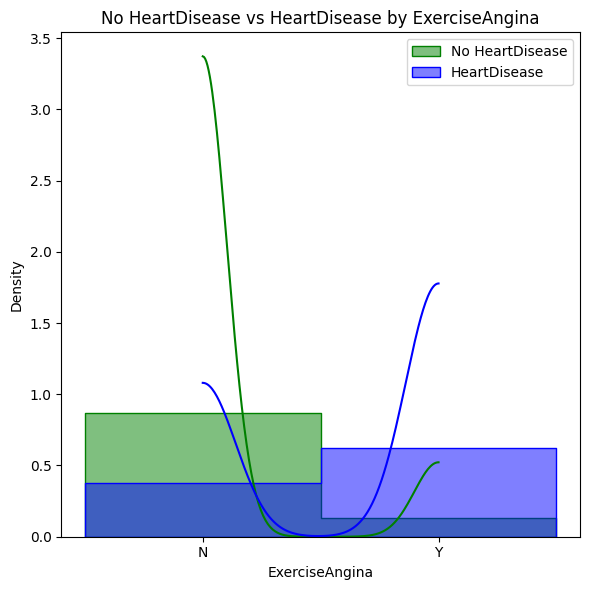

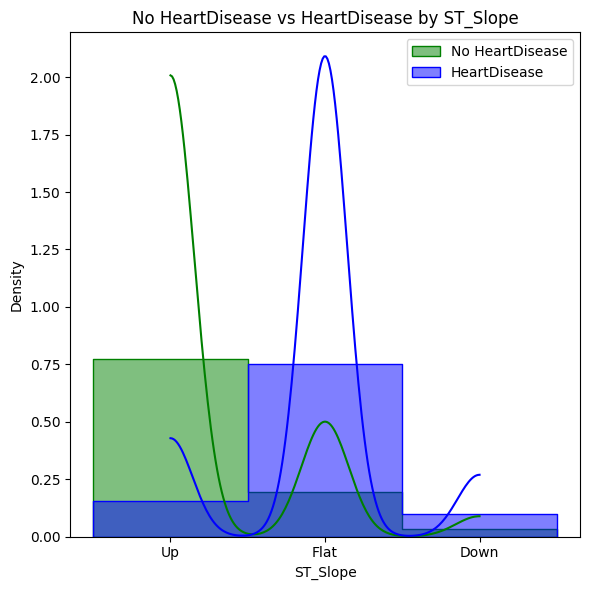

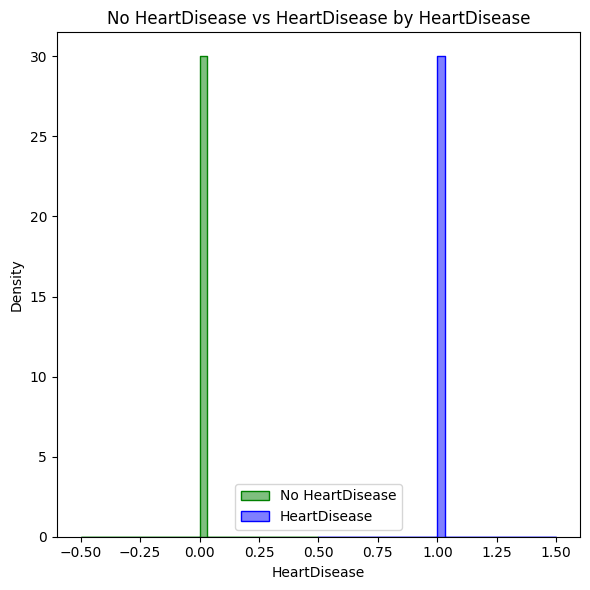

In [43]:
# Define the columns to plot (ensure no typos in column names)
columns_to_plot = [col for col in df.columns if col not in ['Age', 'RestingBP', 'MaxHR', 'Oldpeak']]

# Iterate over each column
for col in columns_to_plot:
    plt.figure(figsize=(6, 6))
    
     # Plot the KDE for HeartDisease == 0 (no disease)
    sns.histplot(df[df['HeartDisease'] == 0][col], color='green', kde=True, element='step', label='No HeartDisease', bins=30, stat='density')
    
    # Plot the KDE for HeartDisease == 1 (with disease)
    sns.histplot(df[df['HeartDisease'] == 1][col], color='blue', kde=True, element='step', label='HeartDisease', bins=30, stat='density')
    
    # Add titles and labels
    plt.title(f"No HeartDisease vs HeartDisease by {col}")
    plt.xlabel(col)
    plt.ylabel('Density')
    
    # Show legend
    plt.legend()
    
    # Display the plot
    plt.tight_layout()
    plt.show()


**6. Encoding Categorical Columns**

In [46]:
df_cat.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [44]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoded_array = encoder.fit_transform(df_cat)
encoded_df = pd.DataFrame(encoded_array, columns = encoder.get_feature_names_out(df_cat.columns))

In [45]:
encoded_df.shape

(918, 16)

**7. Outlier Removal by IQR**

In [47]:
def remove_outliers_iqr(df,columns):
    for col in columns :
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [48]:
df_num.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [49]:
columns_to_check = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease']
df_no_outliers = remove_outliers_iqr(df_num, columns_to_check)

print("Original DataFrame")
print(df_num.shape)
print("DataFrame after Outlier Treatment")
print(df_no_outliers.shape)

Original DataFrame
(918, 7)
DataFrame after Outlier Treatment
(587, 7)


**8. Scaling the data columns**

In [52]:
columns_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease']
standard_scaler = StandardScaler()
df_standard_scaled = df_no_outliers.copy()
df_standard_scaled[columns_to_scale] = standard_scaler.fit_transform(df_no_outliers[columns_to_scale])

In [53]:
final_df=pd.concat([df_standard_scaled,encoded_df],axis=1)

In [54]:
final_df.shape

(918, 23)

In [55]:
final_df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up', 'HeartDisease_0', 'HeartDisease_1'],
      dtype='object')